In [1]:
import os, sys

In [2]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d:\My_toolkits\Python\Python 3.9.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device

device(type='cuda')

In [4]:
sys.path.append('../../')
from models import Pix2PixGanGenerator, Pix2PixGanDiscriminator, Pix2PixGanTrainer, AnimeDataset

In [6]:
BATCH_SIZE = 16
IM_SHAPE = (3,256,256)
EPOCHS = 30

In [7]:
train_dataset = AnimeDataset('../../data/AnimeData/train/')
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

val_dataset = AnimeDataset('../../data/AnimeData/val/')
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)

In [8]:
len(train_dataset)

14224

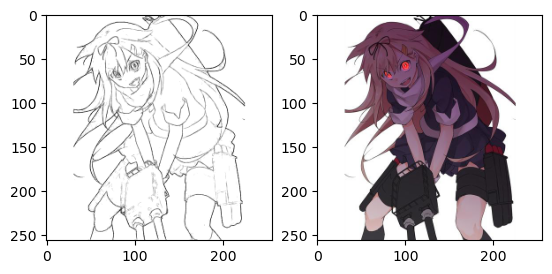

In [92]:
for inp, tar in train_loader:
    inp = inp[0].detach().cpu().numpy().transpose((1,2,0)) * 0.5 + 0.5
    tar = tar[0].detach().cpu().numpy().transpose((1,2,0)) * 0.5 + 0.5

    fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1)
    ax1.imshow(inp)
    ax2.imshow(tar)

    plt.show()
    break

In [9]:
generator = Pix2PixGanGenerator(IM_SHAPE).to(device)
discriminator =  Pix2PixGanDiscriminator(IM_SHAPE).to(device)

In [93]:
Pix2PixGanTrainer(EPOCHS, generator, discriminator, train_loader, val_loader, save_fig_dir='figs', device=device)

Epoch 1/30
889/889 - lossD: 0.4410 - lossG: 19.4898 - 365s/epoch
Epoch 2/30
889/889 - lossD: 0.3479 - lossG: 19.5638 - 365s/epoch
Epoch 3/30
889/889 - lossD: 0.5069 - lossG: 15.8651 - 365s/epoch
Epoch 4/30
889/889 - lossD: 0.4434 - lossG: 17.2439 - 365s/epoch
Epoch 5/30
889/889 - lossD: 0.2115 - lossG: 18.8782 - 370s/epoch
Epoch 6/30
889/889 - lossD: 0.3690 - lossG: 17.0721 - 364s/epoch
Epoch 7/30
889/889 - lossD: 0.4968 - lossG: 19.0835 - 365s/epoch
Epoch 8/30
889/889 - lossD: 0.0880 - lossG: 18.6492 - 365s/epoch
Epoch 9/30
889/889 - lossD: 0.5261 - lossG: 17.0695 - 371s/epoch
Epoch 10/30
889/889 - lossD: 0.3531 - lossG: 15.2155 - 365s/epoch
Epoch 11/30
889/889 - lossD: 0.3686 - lossG: 13.8419 - 365s/epoch
Epoch 12/30
889/889 - lossD: 0.2979 - lossG: 13.9795 - 365s/epoch
Epoch 13/30
889/889 - lossD: 0.3691 - lossG: 17.3829 - 371s/epoch
Epoch 14/30
889/889 - lossD: 0.3856 - lossG: 17.1212 - 365s/epoch
Epoch 15/30
889/889 - lossD: 0.3893 - lossG: 13.2435 - 365s/epoch
Epoch 16/30
889/889

In [110]:
torch.save(generator.state_dict(), 'generator.pt')
torch.save(discriminator.state_dict(), 'discriminator.pt')

In [10]:
generator.load_state_dict(torch.load('../../weights/pix2pix/generator.pt'))
discriminator.load_state_dict(torch.load('../../weights/pix2pix/discriminator.pt'))

<All keys matched successfully>

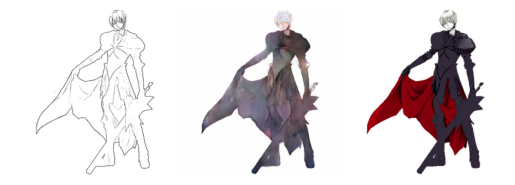

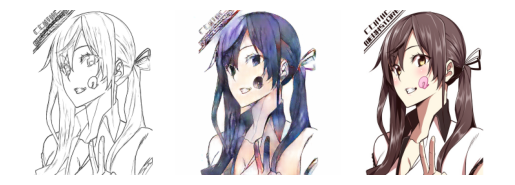

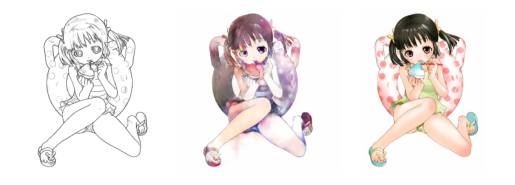

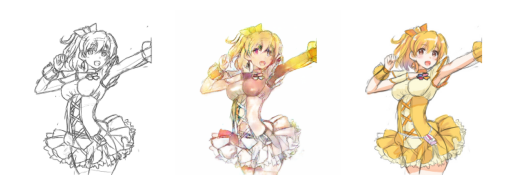

In [12]:
for n, (x,y) in enumerate(val_loader):
    if n == 5:
        x,y = x.to(device), y.to(device)
        y_fake = generator(x)
        ims = torch.cat([x,y_fake,y],dim=-1)*0.5+0.5
        for im in ims:
            im = im.detach().cpu().numpy().transpose((1,2,0))
            plt.imshow(im)
            plt.axis('off')
            plt.show()
        break